# Dendrogramma

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def pdist(data):
    m, n = data.shape
    dm = np.zeros((m * (m - 1)) // 2, dtype=np.double)
    k = 0
    for i in range(0, m - 1):
        for j in range(i + 1, m):
            dm[k] = np.sqrt(np.sum((data[i] - data[j]) ** 2))
            k += 1
    return dm

In [35]:
def linkage(Y):
    m = int(np.ceil(np.sqrt(Y.shape[0] * 2)))
    Z = np.zeros((m - 1, 4))
    data = np.zeros((m, m))
    data[np.triu_indices(m, k=1)] = Y
    for k in range(m - 1):
        x, y = np.where(data == np.min(data[np.nonzero(data)]))
        i = min(x[0], y[0])
        j = max(x[0], y[0])
        Z[k, :2] = i, j
        Z[k, 2] = data[i, j]
        Z[k, 3] = (data[i] != 0).sum() + (data[j] != 0).sum()
        data[i] = (data[i] + data[j]) / 2
        data[:, i] = (data[:, i] + data[:, j]) / 2
        data[j] = 0
        data[:, j] = 0
    return Z

In [33]:
def plot_dendrogram(Z):
    m = Z.shape[0] + 1
    plt.figure(figsize=(10, 5))
    plt.title('Dendrogram')
    plt.xlabel('Index')
    plt.ylabel('Distance')
    for k in range(m - 1):
        i = int(Z[k, 0])
        j = int(Z[k, 1])
        x = [k, k, m + k - 1]
        y = [i, j, (Z[i - 1, 2] + Z[j - 1 ,2]) / 2]
        plt.plot(x[:2], y[:2], c='k')
        plt.plot(x[1:], y[1:], c='k')
    plt.show()

[[0.         1.         2.82842712 3.        ]
 [0.         0.         0.70710678 4.        ]]


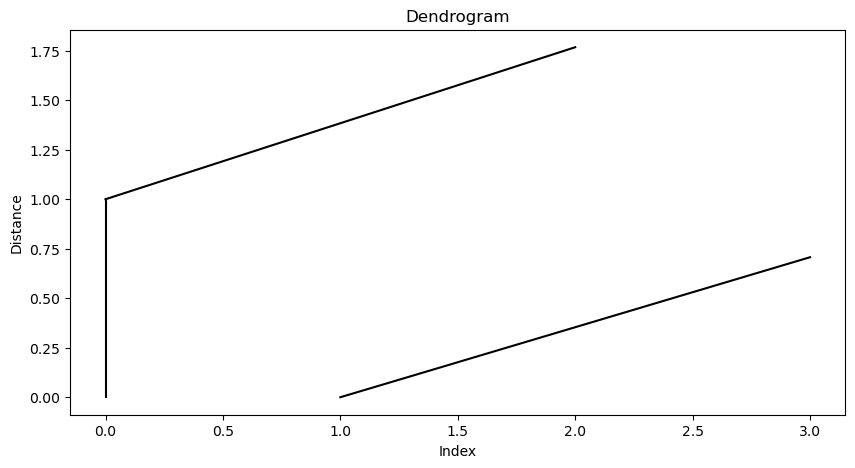

In [37]:
data = np.array([[1., 2.], [3., 4.], [5., 6.]])
Y = pdist(data)
Z = linkage(Y)
print(Z)
plot_dendrogram(Z)

# Preparazione retta di taratura

In [1]:
from chemtools.utility import make_standards

In [2]:
make_standards(0.1,5,n_standard=12,decimal=1)

array([0.1, 0.5, 1. , 1.4, 1.9, 2.3, 2.8, 3.2, 3.7, 4.1, 4.6, 5. ])

To compensate for possible slight losses of chromium during digestion or other operations of the analysis, treat the chromium standards by the same procedure as the sample. Accordingly, pipet a chromium standard solution in measured volumes into 250-mL beakers or conical flasks to generate standard concentrations ranging from 0.5 to 5 mg/L Cr(VI) when diluted to the appropriate volume.



or 10 to 100 micrograms of Cr(VI)


# Test Joblib per salvare i modelli ottenuti e non dover ricalcolare tutto da zero ogni volta

In [4]:
import joblib

def save_pipeline(*, pipeline_to_persist: Pipeline) -> None:
    """Persist the pipeline.
    Saves the versioned model, and overwrites any previous
    saved models. This ensures that when the package is
    published, there is only one trained model that can be
    called, and we know exactly how it was built.
    """

    # Prepare versioned save file name
    save_file_name = f"{config.app_config.pipeline_save_file}{_version}.pkl"
    save_path = TRAINED_MODEL_DIR / save_file_name

    remove_old_pipelines(files_to_keep=[save_file_name])
    joblib.dump(pipeline_to_persist, save_path)

NameError: name 'Pipeline' is not defined

In [23]:
def save_model(model, name, out_dir=""):
    # Save the model
    if out_dir !="":
        out_dir=f"{out_dir}/"
    joblib.dump(model , f'{out_dir}{name}.jlib')

In [27]:
def load_model(name):
    # Load the model "name.jlib"
    return joblib.load(name)

# Area under scatter plot in python
[link](https://stackoverflow.com/questions/54205300/area-under-scatter-plot-in-python)

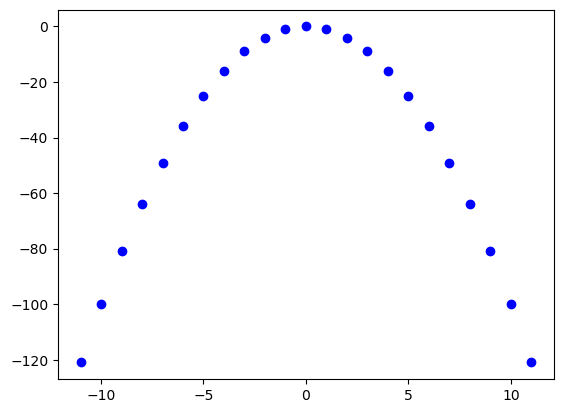

-890.9999999999999


In [6]:
import matplotlib.pyplot as plt
import numpy as np
xs = np.array([-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11])
ys = xs**2
sum = 0
plt.plot(xs, ys, 'bo')
plt.show()
for i in range(1, len(xs)):
    slope = (xs[i]-xs[i-1])/(ys[i] - ys[i-1])
    delta_x = x_sort[i] - x_sort[i - 1]
    delta_y =  ys[i - 1] + (ys[i-1] + delta_x * slope)
    sum = sum + (delta_y/2 * delta_x)
print(sum)

# Spettroscopia di massa

In [9]:
import numpy as np

## identifico la massa dello ione in base alla modalità di analisi

In [31]:
def ionization(ionization, ion_mass):

    if ionization == "EI":
        return ion_mass
    elif ionization == "CI":
        return ion_mass + 1
    else:
        print("ionization può essere solo \"EI\" o \"CI\"")

In [32]:
ionization("CI", 3)

4

## Picchi isotopici
I picchi isotopici hanno una proporzione che segue il seguente schema:

- **q** = numero di volte in cui l’elemento isotopico compare
- **n** = numero specie isotopiche dell’elemento
- **m** = abbondanza isotopica relativa
- **h** = altezza relativa dei picchi isotopici

**hpicchi = (m1 + m2 + ... + mn)q**

Svolgendo l’elevamento del polinomio si ottengono dei polinomi del tipo (q=2, n=2 m1=3 (75%) e m2=1 (25%)) ⟶ $1a^2 + 2ab + 1b^2 = 9 + 6 + 1$

I tre numeri sono l’altezza relativa dei picchi, solo dei picchi isotopici però, non confondere le altezze relative con altre altezze esempio picco base.

## Elementi possibili data una massa

- M ⟶ ione molecolare
- M+1 ⟶ informazioni sulla composizione elementare. Dato uno ione $C_nH_m,\;I_{(M + 1)}= n \cdot 1.08_{contributo^{13}C}+ m \cdot 0.012_{contributo^2H} $
- M+2 ⟶ informazioni su [[O]], [[S]] e [[alogeni]]
- M+4, M+6 ⟶ segnali dovuti a [[Br]] e [[Cl]].
1. Per determinare il numero di **N** bisogna tener conto del valore m/z dello ione molecolare. Se una molecola contiene 2n+1 N, la massa nominale di M sarà dispari. 2n N, la massa nominale di M sarà pari (Regola dell’azoto). Questo nelle tecniche Hard, contrariamente, nelle tecniche Soft la regola si inverte e viene mostrata una massa pari con una quantità di 2n+1 N e una massa dispari con una quantità di 2n N.
2. Per determinare il numero di atomi di **C** bisogna eseguire il calcolo: $n{^\circ}C = \frac{[M + 1](\%)}{[M](\%)}$
3. Per determinare il numero di atomi che danno $M+2$ (**O** o **S**) devo fare: $n{^\circ}O\ o\ S = \frac{[M + 2](\%)}{[M](\%)}$, se il numero viene particolarmente alto, o $M+2$ è alto, si deve presumere la presenza di S, se sono molto alti entrambi, M e M+2, si ha la compresenza di zolfo e ossigeno.
4. Per determinare **alogeni o altri atomi che hanno isotopi stabili** bisogna guardare l’abbondanza dei picchi a M+n

In [46]:

def number_of_c(eight_of_M,eight_of_M1):
    """Per determinare il numero di atomi di **C**

    Args:
        eight_of_M (_type_): segnale del picco dello ione molecolare Corrisponde all'abbondanza 12C
        eight_of_M1 (_type_): segnale del picco dello ione molecolare + 1, corrisponde all'abbondanza 13C
    """
    return round(eight_of_M1/eight_of_M,2)*100-1

In [47]:
number_of_c(24,2.7)

10.0

In [51]:
def if_thereis_N(M):
    if M % 2 == 0:
        return print("La molecola contiene 2n N")
    else:
        return print("La molecola contiene 2n+1 N")

In [52]:
if_thereis_N(100)

La molecola contiene 2n N


## Numeri di atomi che danno M+2

In [60]:
def number_of_OS(eight_of_M,eight_of_M2):

    return round(eight_of_M2/eight_of_M,2)*10

In [61]:
number_of_OS(4.7,1.5)

3.2

### Presenza di elementi con rapporti isotipici

In [63]:
import sympy as sy
def peack_hight_of_isotope(q,b,m,h):



SyntaxError: incomplete input (801286913.py, line 3)

# Dendrogramma

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

class Dendrogram:

    def __init__(self, data, linkage_method='ward'):
        self.data = data
        self.linkage_method = linkage_method
        self.n, _ = data.shape
        self.Z = linkage(self.data, linkage_method)

    def plot(self):
        plt.figure()
        plt.title('Hierarchical Clustering Dendrogram')
        plt.xlabel('sample index')
        plt.ylabel('distance')
        dendrogram(self.Z, leaf_rotation=90., leaf_font_size=8.)
        plt.show()


In [25]:
dendogramma=Dendrogram(matrix_data)

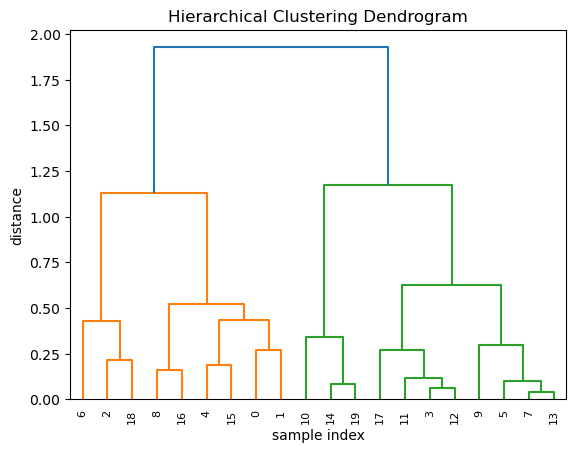

In [27]:
dendogramma.plot()

In [31]:
import numpy as np
import matplotlib.pyplot as plt

class Dendrogram:
    def __init__(self, data, linkage_method='single'):
        self.data = data
        self.linkage_method = linkage_method
        self.linkage_matrix = self.linkage_matrix(self.data, self.linkage_method)

    def linkage_matrix(self, data, linkage_method='single'):
        """
        Calcola la matrice di linkage a partire dai dati e dal metodo di linkage scelto
        """
        n, _ = data.shape
        distances = np.zeros((n, n))
        for i in range(n):
            for j in range(i + 1, n):
                distances[i, j] = euclidean_distance(data[i], data[j])
                distances[j, i] = distances[i, j]
        linkage_matrix = np.zeros((n - 1, 4))
        current_cluster_id = n
        for i in range(n - 1):
            if linkage_method == 'single':
                min_distance = np.min(distances)
            elif linkage_method == 'complete':
                min_distance = np.max(distances)
            elif linkage_method == 'average':
                min_distance = np.mean(distances)
            else:  # linkage_method == 'ward'
                min_distance = np.sum(distances)
            x, y = np.unravel_index(np.argmin(distances), distances.shape)
            linkage_matrix[i, :] = x, y, min_distance, current_cluster_id
            current_cluster_id += 1
            distances[x, :] = np.minimum(distances[x, :], distances[y, :])
            distances[:, x] = distances[x, :]
            distances[y, :] = np.inf
            distances[:, y] = np.inf
        return linkage_matrix

    def plot(self):
        """
        Disegna il dendrogramma utilizzando la matrice di linkage
        """
        plt.figure()
        plt.title('Hierarchical Clustering Dendrogram')
        plt.xlabel('sample index')
        plt.ylabel('distance')
        dendrogram(self.linkage_matrix, leaf_rotation=90., leaf_font_size=8.)
        plt.show()



In [32]:
Dendrogram(matrix_data)

NameError: name 'euclidean_distance' is not defined

In [ ]:
§